In [107]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

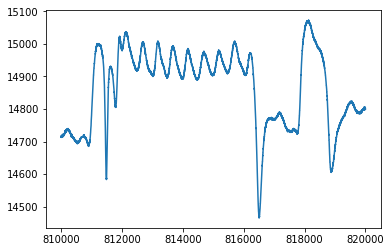

In [108]:
with np.load('mm_data.npz') as zf:
    raw_data = zf['mm'].astype('float64')
    coords =  zf['coords']
    
# print(mm_data)
plt.plot(coords, raw_data[0])

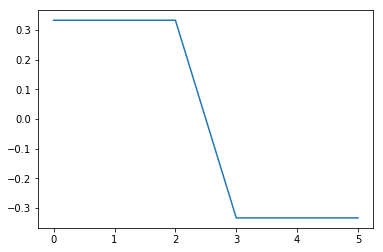

In [109]:
def make_kernel(l):
    l = max(1, l)
    o = np.full((l,), 1.0/l, dtype='f8')
    res = np.concatenate([o, -o])
    assert(np.sum(res) < 1.0e-8)
    return res
    
plt.plot(make_kernel(3))

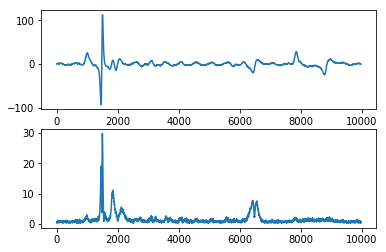

In [110]:
kernel = make_kernel(10)

processed_data = np.array([np.convolve(raw_ch, kernel, mode='valid') for raw_ch in raw_data])

#print(processed_data)
#print(processed_data.shape)

data_mean = np.sum(processed_data, axis=0) / processed_data.shape[0]
data_disp = np.std(processed_data, axis=0) 
# print(data_disp)

plt.subplot(2,1,1)
plt.plot(data_mean)
plt.subplot(2,1,2)
plt.plot(data_disp)

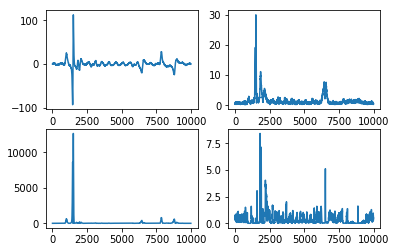

In [123]:
data_mean_prep = np.power(data_mean, 2)
# data_mean_prep = np.abs(data_mean)
data_mean_prep = np.maximum(data_mean_prep, 1)

data_disp_prep = data_disp / data_mean_prep

plt.subplot(2,2,1)
plt.plot(data_mean)
plt.subplot(2,2,2)
plt.plot(data_disp)

plt.subplot(2,2,3)
plt.plot(data_mean_prep)
plt.subplot(2,2,4) # .set_ylim(0,0.1)
plt.plot(data_disp_prep)